<a href="https://colab.research.google.com/github/hojune-choi/pytorch_implementation/blob/master/linear_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Neural Network**

## Linear Regression

Regression: 하나 이상의 독립 변수와 종속 변수 사이의 관계를 모델링하는 방법 

머신러닝에서는 _예측_ 과 관련있음

* dataset = training dataset, training set
* each row = example, data instance, data point, sample
* thing we are tring to predict = label, target
* independent variables = features, covariates

### **Linear Model**

**선형 회귀의 4가지 가정**
* 선형성: 종속변수와 독립변수 간의 선형 관계
* 독립성: 독립 변수들 간의 통계적 독립성
* 등분산성: 잔차들의 분산이 일정
* 정규성: 잔차들의 분포가 정규 분포를 이룸

$ \hat y = w_1x_1 + ... + w_dx_d + b
$

$ \hat y = \mathbf{w} ^\top \mathbf{x} + b    $

$ \mathbf{\hat y} = \mathbf{X} \mathbf{w} + b    $

### **Loss Function**

$ l^{(i)}(\mathbf{w}, b) = \frac{1}{2} (\hat y^{(i)} - y^{(i)})^2  $

여기서 $\frac{1}{2}$은 단순히 계산의 편의를 위함

$ L(\mathbf{w},b) = \frac{1}{n} \sum_{i=1}^{n}l^{(i)}(\mathbf{w},b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} (\mathbf{w}^\top \mathbf{x}^{(i)}+b-y^{(i)})^2    $

$ \mathbf{w}^*, b^* = argmin_{\mathbf{w},b} \ L(\mathbf{w},b)   $

### **Analytic Solution**

선형 회귀에서 경사하강법과는 다르게 단 한번의 계산으로 w를 구할 수 있음

$ \mathbf{w}^* = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}   $

하지만 매우 제한된 상황에서만 사용할 수 있어 deep learning에서는 사용되지 않음

즉, 선형 회귀에서
1. 10,000개 이하의 데이터는 normal equation으로 한번에 계산하는 것이 빠름
2. 그 이상은 경사하강법으로 학습하는 것이 빠름

### **Minibatch Stochastic Gradient Descent**


$ (\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathbf{\beta}|}\sum_{i \in \mathbf{\beta}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b) $

### **The Normal Distribution and Squared Loss**

$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp {(-\frac{1}{2\sigma^2}(x - \mu)^2)} $

In [ ]:
def normal(x, mu, sigma):
  p = 1 / math.sqrt(2*math.pi*sigma**2)
  return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

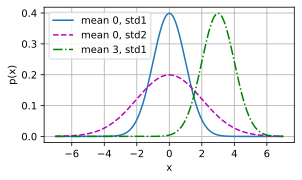

In [ ]:
x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std{sigma}' for mu, sigma in params])

$ y = \mathbf{w}^\top \mathbf{x} + b + \epsilon  \text{ where } \epsilon \sim N(0, \sigma^2) $

$ P(y|\mathbf{x}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp(-\frac{1}{2\sigma^2}(y-\mathbf{w}^\top \mathbf{x} - b)^2) $

$ P(\mathbf{y} | \mathbf{X}) = \prod_{i=1}^n p(y^{(i)}| \mathbf{x}^{(i)}) $

$ -\log P(\mathbf{y}|\mathbf{X}) = \sum_{i=1}^{n} \frac{1}{2} \log(2\pi\sigma^2) + \frac{1}{2\sigma^2}(y^{(i)}-\mathbf{w}^\top\mathbf{x}^{(i)}-b)^2 $

### **Implementation**

In [ ]:
!pip install d2l

     |████████████████████████████████| 61kB 1.6MB/s 


In [ ]:
%matplotlib inline
from d2l import torch as d2l
import torch
import random

In [ ]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.2892,  1.4086]) 
label: tensor([-1.1849])


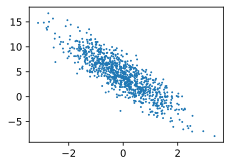

In [ ]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1);

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0634,  0.4502],
        [ 0.3022, -1.9603],
        [-1.7553, -0.5928],
        [-0.2748, -0.3567],
        [-1.0776,  0.1308],
        [ 0.3746, -0.2461],
        [-0.9788,  0.0810],
        [ 0.8997,  0.5020],
        [ 1.0468, -1.1149],
        [-0.1532, -0.4459]]) 
 tensor([[ 2.5425],
        [11.4574],
        [ 2.7096],
        [ 4.8648],
        [ 1.6025],
        [ 5.7949],
        [ 1.9529],
        [ 4.2971],
        [10.0872],
        [ 5.4116]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [ ]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.039574
epoch 2, loss 0.000156
epoch 3, loss 0.000049


In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0009, -0.0008], grad_fn=<SubBackward0>)
error in estimating b: tensor([-2.4319e-05], grad_fn=<RsubBackward1>)


## Softmax Regression

### **Softmax Operation**

$ \mathbf{\hat y} = softmax(\mathbf{o}) \text{  where  } \hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)} $

$ argmax_j \  \hat y_j = argmax_j \ o_j $

### **Vectorization for Minibatches**

$ \mathbf{O} = \mathbf{X}\mathbf{W} + \mathbf{b} $

$ \mathbf{\hat Y} = softmax(\mathbf{O}) $

### **Loss Function**

**Log-Likelihood**

$ P(\mathbf{Y} | \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)}
 | \mathbf{x}^{(i)}) $

$ -\log P(\mathbf{Y} | \mathbf{X}) = \sum_{i=1}^n - \log P(\mathbf{y}^{(i)} | \mathbf{x}^{(i)}) = \sum_{i=1}^n l(\mathbf{y}^{(i)}, \mathbf{\hat y}^{(i)})
$

$ l(\mathbf{y},\mathbf{\hat y}) = - \sum_{j=1}^q y_j\log \hat y_j
$

**Softmax and Derivatives**

$ l(\mathbf{y}, \mathbf{\hat y}) = -\sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} $

$ \ \ \ \ \ \ \ \ \ \ \ = \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j $

$ \ \ \ \ \ \ \ \ \ \ \ = \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j
$

$ \partial_{oj} l(\mathbf{y}, \mathbf{\hat y}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = softmax(\mathbf{o})_j - y_j $

## Implementation

### **Linear Regression**

In [ ]:
!pip install d2l

In [ ]:
!pip install mxnet

In [ ]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
import random
npx.set_np()

In [ ]:
#Generating the Dataset
def synthetic_data(w, b, num_examples):
  """Generate y = Xw + b + noise."""
  X = np.random.normal(0, 1, (num_examples, len(w)))
  y = np.dot(X, w) + b
  y += np.random.normal(0, 0.01, y.shape)
  return X, y


true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print('features:',features[0], '\nlabel:', labels[0])

features: [2.2122064 1.1630787] 
label: 4.662078


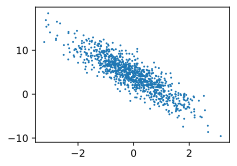

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1);

In [ ]:
#Reading the Dataset
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  # The examples are read at random, in no particular order
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = np.array(
      indices[i: min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
 print(X, '\n', y)
 break


[[-0.68380946 -0.36712068]
 [-1.0310302  -1.0057124 ]
 [-1.5246642   0.03460409]
 [-0.33354783  0.5080506 ]
 [-0.19628292  0.32660788]
 [-0.36137256  0.98650014]
 [ 3.2904532   0.13123234]
 [ 0.59860843 -3.0636313 ]
 [-0.4984026  -0.04614415]
 [-1.7383806  -0.6379685 ]] 
 [ 4.0782847   5.54579     1.0212421   1.8082823   2.6886718   0.11717813
 10.31914    15.81957     3.3562608   2.8726306 ]


In [ ]:
#Initializing Model Parameters
w = np.random.normal(0, 0.01, (2, 1))
b = np.zeros(1)
w.attach_grad()
b.attach_grad()

In [ ]:
#Defining the Model
def linreg(X, w, b):
  """The linear regression model."""
  return np.dot(X, w) + b

In [ ]:
#Defining the Loss Function
def squared_loss(y_hat, y):
  """Squared loss."""
  return (y_hat - d2l.reshape(y, y_hat.shape)) ** 2 / 2

In [ ]:
#Defining the Optimization Algorithm
def sgd(params, lr, batch_size):
  """Minibatch stochastic gradient descent."""
  for param in params:
    param[:] = param - lr * param.grad / batch_size

In [ ]:
#Training
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    with autograd.record():
      l = loss(net(X, w, b), y) # Minibatch loss in `X` and `y`
    # Because `l` has a shape (`batch_size`, 1) and is not a scalar
    # variable, the elements in `l` are added together to obtain a new
    # variable, on which gradients with respect to [`w`, `b`] are computed
    l.backward()
    sgd([w, b], lr, batch_size) # Update parameters using their gradient
  train_l = loss(net(features, w, b), labels)
  print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.024697
epoch 2, loss 0.000087
epoch 3, loss 0.000051


In [ ]:
print(f'error in estimating w: {true_w - d2l.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 0.00037646 -0.00019932]
error in estimating b: [0.00039291]


### **Image Classification Dataset**

In [ ]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torchvision import transforms
from torch.utils import data

d2l.use_svg_display()

In [ ]:
# `ToTensor` converts the image data from PIL type to 32-bit floating point
# tensors. It divides all numbers by 255 so that all pixel values are between
# 0 and 1
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!





In [ ]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [ ]:
mnist_train[0][0].shape
mnist_train[0][1]

9

In [ ]:
def get_fashion_mnist_labels(labels):  #@save
    """Return text labels for the Fashion-MNIST dataset."""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(d2l.numpy(img))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

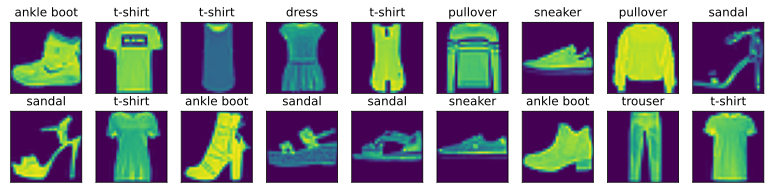

In [ ]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [ ]:
batch_size = 256

def get_dataloader_workers():  #@save
    """Use 4 processes to read the data."""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [ ]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'4.55 sec'

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """Download the Fashion-MNIST dataset and then load it into memory."""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [ ]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


### **Softmax Regression**

In [ ]:
from d2l import torch as d2l
import torch
from IPython import display

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
#Initializing Model parameters
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]), tensor([[ 6.],
         [15.]]))

In [ ]:
#Softmax Operation
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [ ]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1958, 0.4819, 0.0692, 0.0337, 0.2193],
         [0.1776, 0.0725, 0.0103, 0.6316, 0.1080]]), tensor([1., 1.]))

In [ ]:
#Define Model
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [ ]:
#Define Loss
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [ ]:
def accuracy(y_hat, y):  #@save
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(d2l.reduce_sum(cmp.type(y.dtype)))

In [ ]:
accuracy(y_hat, y) / len(y)

0.5

In [ ]:
def evaluate_accuracy(net, data_iter):  #@save
    """Compute the accuracy for a model on a dataset."""
    if isinstance(net, torch.nn.Module):
        net.eval()  # Set the model to evaluation mode
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    for _, (X, y) in enumerate(data_iter):
        metric.add(accuracy(net(X), y), d2l.size(y))
    return metric[0] / metric[1]

In [ ]:
class Accumulator:  #@save
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
evaluate_accuracy(net, test_iter)

0.0804

In [ ]:
#Training
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y),
                       y.size().numel())
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
class Animator:  #@save
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [ ]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [ ]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

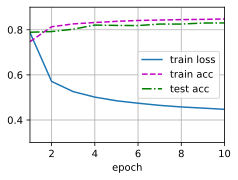

In [ ]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

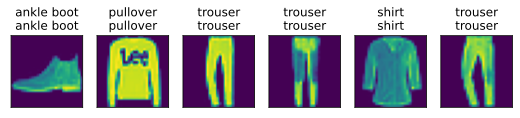

In [ ]:
def predict_ch3(net, test_iter, n=6):  #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(d2l.argmax(net(X), axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(d2l.reshape(X[0:n], (n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)